# Microsoft Movie Studio Analysis


## 1. Project Overview
### 1.1. Project Goal
To provide Microsoft with actionable insights on the types of films that are currently performing well at the box office. This will help guide their strategy in creating successful original video content for their new movie studio.

#### Specific Goals:
- Identify the top-performing genres at the box office.
- Analyze the characteristics of successful films, such as budget, runtime, cast, and release date.
- Examine the correlation between movie ratings (from IMDB, Rotten Tomatoes, etc.) and box office success.
- Provide three concrete recommendations based on the analysis to inform Microsoft’s movie production strategy.
### 1.2. Audience
The primary audience for this analysis is the business stakeholders, specifically the head of Microsoft's new movie studio. The insights derived from this analysis will assist them in making informed decisions regarding their movie production strategy.
### 1.3. Dataset
For this comprehensive analysis, data was sourced from multiple reputable sources in the movie industry to ensure thorough coverage of relevant information. The main datasets used include:

- **IMDB**: The Internet Movie Database (IMDB)
- **Box Office Mojo**: Box Office Mojo
- **Rotten Tomatoes**: Rotten Tomatoes
- **TheMovieDB**: TheMovieDB
- **The Numbers**: The Numbers

The primary datasets were sourced from `im.db`, a SQLite database containing detailed movie information, and `bom.movie_gross.csv.gz`, a compressed CSV file from Box Office Mojo containing box office gross data.


## 2. Business Understanding


### 2.1. Stakeholder and Key Business Questions
To address the needs of the stakeholders and guide the analysis effectively, the following key business questions were identified:

- What genres of movies are performing best at the box office?
- What are the characteristics (budget, duration, cast, etc.) of high-performing movies?
- How do ratings from different sources (IMDB, Rotten Tomatoes, etc.) correlate with box office success?



## 3. Data Understanding and Preparation
### 3.1. Data Collection
For this analysis, data was sourced from multiple reputable sources in the movie industry. The primary datasets were obtained from the following sources:

- **IMDB**
- **Box Office Mojo**
- **Rotten Tomatoes**
- **TheMovieDB**
- **The Numbers**

The main datasets used for this analysis were sourced from `im.db`, a SQLite database containing detailed movie information, and `bom.movie_gross.csv.gz`, a compressed CSV file from Box Office Mojo containing box office gross data.


In [26]:
#Import necessary libraries
import pandas as pd
import sqlite3 
import csv
import matplotlib.pyplot as plt
import seaborn as sns


In [27]:
# Load datasets
conn = sqlite3.connect('im.db')
imdb_df = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'", conn)
print(imdb_df)



            name
0   movie_basics
1      directors
2      known_for
3     movie_akas
4  movie_ratings
5        persons
6     principals
7        writers


In [28]:
box_m_df = pd.read_csv('bom.movie_gross.csv')
#movies_gross_df.head
list(box_m_df.columns)

['title', 'studio', 'domestic_gross', 'foreign_gross', 'year']

In [29]:
tmdb_movies_df = pd.read_csv('tmdb.movies.csv')
list(tmdb_movies_df.columns)

['Unnamed: 0',
 'genre_ids',
 'id',
 'original_language',
 'original_title',
 'popularity',
 'release_date',
 'title',
 'vote_average',
 'vote_count']

In [30]:
the_n_df = pd.read_csv('tn.movie_budgets.csv')
list(the_n_df.columns)

['id',
 'release_date',
 'movie',
 'production_budget',
 'domestic_gross',
 'worldwide_gross']

### 3.2. Data Cleaning
Data cleaning is a crucial step to ensure the integrity and reliability of the analysis. In this phase, the following steps were performed:

- **Handle Missing Values**: Missing values were identified and appropriately handled to avoid any biases in the analysis.
- **Standardize Data Formats**: Data formats such as dates and currencies were standardized to ensure consistency across the datasets.
- **Merge Datasets**: The datasets were merged on common keys, such as movie titles and release dates, to consolidate the information for analysis.


In [40]:
# Handle missing values
box_m_df.isnull().sum()


title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [48]:
box_m_df.describe

<bound method NDFrame.describe of                                             title      studio  domestic_gross  \
0                                     Toy Story 3          BV     415000000.0   
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          1700

<AxesSubplot:ylabel='Frequency'>

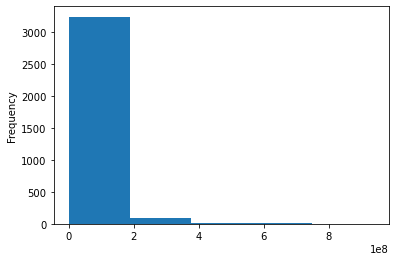

In [55]:
box_m_df['domestic_gross'].plot.hist(bins=5)

In [60]:
#get median 
median_box_m= box_m_df['domestic_gross'].median()
#fill missing values with median
box_m_df['domestic_gross'].fillna(median_box_m, inplace=True)


title                0
studio               5
domestic_gross       0
foreign_gross     1350
year                 0
dtype: int64

In [61]:
box_m_df['studio'].dropna(inplace=True)

In [63]:
tmdb_movies_df.isnull().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [70]:
tmdb_movies_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


<AxesSubplot:ylabel='Frequency'>

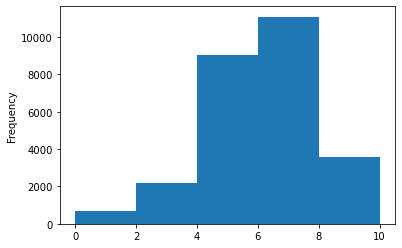

In [66]:

tmdb_movies_df['vote_average'].plot.hist(bins=5)

In [69]:
#check null values 
the_n_df.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [71]:
#view the first 5 rows
the_n_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [74]:
the_n_df.describe

<bound method NDFrame.describe of       id  release_date                                        movie  \
0      1  Dec 18, 2009                                       Avatar   
1      2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2      3   Jun 7, 2019                                 Dark Phoenix   
3      4   May 1, 2015                      Avengers: Age of Ultron   
4      5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   
...   ..           ...                                          ...   
5777  78  Dec 31, 2018                                       Red 11   
5778  79   Apr 2, 1999                                    Following   
5779  80  Jul 13, 2005                Return to the Land of Wonders   
5780  81  Sep 29, 2015                         A Plague So Pleasant   
5781  82   Aug 5, 2005                            My Date With Drew   

     production_budget domestic_gross worldwide_gross  
0         $425,000,000   $760,507,625  $2,776,345,279  
1

In [73]:
imdb_df.isna().sum()

name    0
dtype: int64

In [32]:
# Standardize data formats



In [33]:
# Merge datasets


### 3.3. Data Exploration
Exploratory data analysis (EDA) was conducted to gain insights into the dataset and identify patterns and trends. This involved:

- Initial exploration to understand data distributions and relationships.
- Summary statistics and visualizations, such as histograms and box plots, to visualize the data.



In [34]:
# Initial exploration



In [35]:
# Visualizations


In [36]:
# Example: distribution of movie budgets

## 4. Data Analysis
### 4.1. Exploratory Data Analysis (EDA)
EDA was conducted to analyze the dataset and address the key business questions. The analysis included:

- Analyzing genre performance at the box office.
- Investigating the relationship between movie ratings and box office revenue.
- Studying the impact of movie budgets on profitability.




In [37]:
# Analyze genre performance

# Ratings vs Box Office Revenue


### 4.2. Feature Engineering
Feature engineering involved creating new features based on existing data and transforming categorical data into numerical format where necessary. This step aimed to enhance the predictive power of the analysis.



In [38]:
# Create new features


### 4.3. Visualization
Visualization played a crucial role in presenting the findings of the analysis in a clear and understandable manner. Visualizations such as bar charts and scatter plots were used to support the analysis and make it accessible to a non-technical audience.



In [39]:
# Visualizations for findings

# Scatter plot for ratings vs revenue


## 5. Recommendations
### 5.1. Business Recommendations
Based on the analysis, the following recommendations were made to inform Microsoft’s movie production strategy:

- Focus on producing films in genres that consistently perform well at the box office.
- Invest in films with moderate budgets to maximize return on investment (ROI).
- Consider movie ratings from IMDB and Rotten Tomatoes when greenlighting new projects.